In [11]:
#loading the packages to ne used
import numpy as np #data manipulation
import matplotlib.pyplot as plt #visualization
import pandas as pd #manipulation
import seaborn as sns #visualization
plt.rcParams['figure.figsize'] = [8,5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('ggplot')

In [3]:
#import the dataset
insurance = pd.read_csv("insurance.csv")
print('\nNumber of rows and columns in the dataset: ',insurance.shape)
print('')

#the top rows and columns in the dataset
insurance.head(10)


Number of rows and columns in the dataset:  (1338, 7)



,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


Text(0.5, 1.0, 'INSURANCE CHARGES VS BMI')

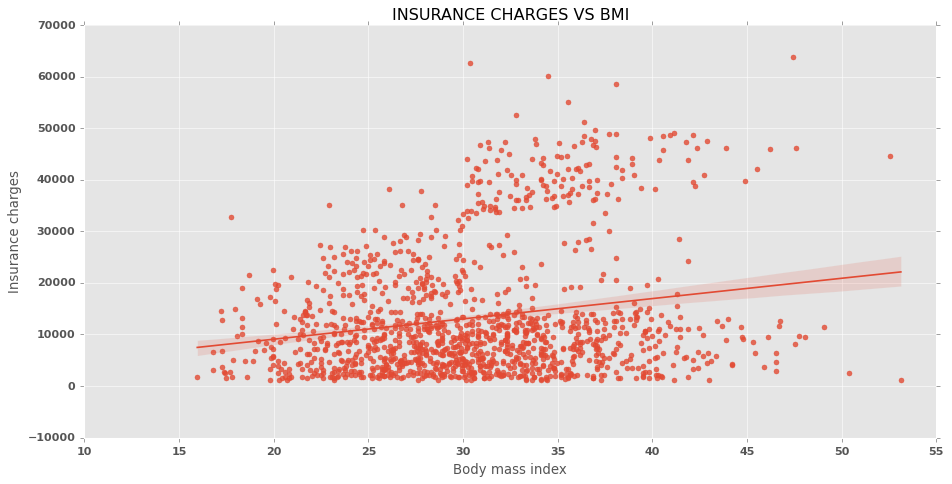

In [12]:
"""for the purpose of visualization, we will fit the line using the bmi as the independent variable and charges as the dependent variable """
sns.lmplot(x='bmi',y='charges',data = insurance, aspect =2, height =6)
#add labels to the plot
plt.xlabel('Body mass index')
plt.ylabel('Insurance charges')
#add the title
plt.title('INSURANCE CHARGES VS BMI')

In [5]:
"""hypothesis function, cost function, normal equation"""
#exploratory data analysis
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


'there is no missing value in the dataset'

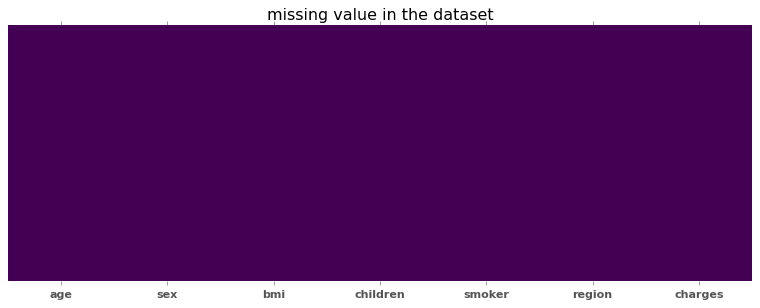

In [13]:
#check for the missing values
plt.figure(figsize=(12,4))
sns.heatmap(insurance.isnull(),cbar=False,cmap='viridis',yticklabels=False)
#add title
plt.title('missing value in the dataset')
"""there is no missing value in the dataset"""

C:\Users\Baha\AppData\Local\Temp\ipykernel_11736\4104815242.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance['charges'], bins = 50, color = 'r', ax=ax)
C:\Users\Baha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Baha\AppData\Local\Temp\ipykernel_11736\4104815242.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-le

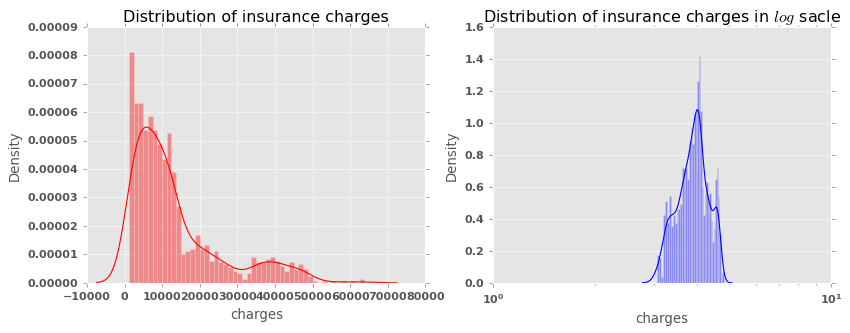

In [14]:
f = plt.figure(figsize=(12,4))

ax =f.add_subplot(121)

sns.distplot(insurance['charges'], bins = 50, color = 'r', ax=ax)

ax.set_title('Distribution of insurance charges')

ax=f.add_subplot(122)
sns.distplot(np.log10(insurance['charges']),bins=40,color='b',ax=ax)
ax.set_title('Distribution of insurance charges in $log$ sacle')
ax.set_xscale('log')

Text(0.5, 1.0, 'Violin plot of charges vs smoker')

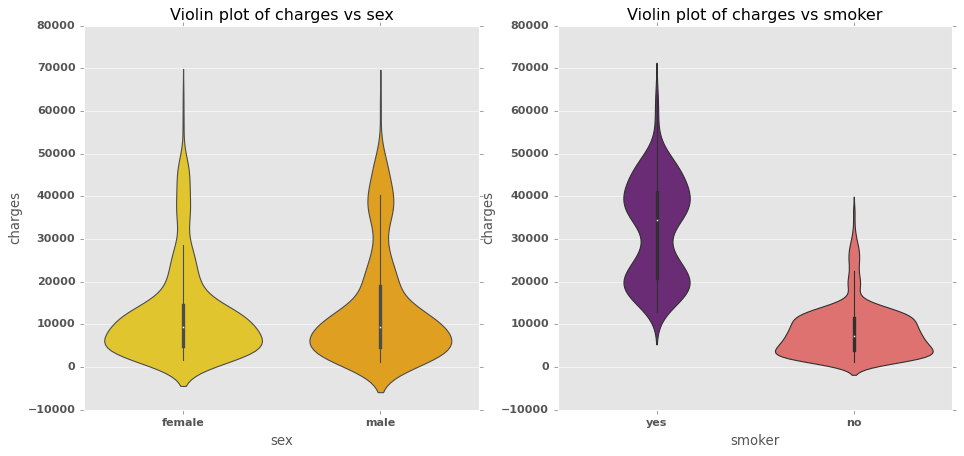

In [15]:
#violin plot
f=plt.figure(figsize=(14,6))

ax=f.add_subplot(121)

sns.violinplot(x='sex',y='charges', data = insurance, palette ='Wistia', ax=ax)

ax.set_title('Violin plot of charges vs sex')

ax=f.add_subplot(122)

sns.violinplot(x='smoker',y='charges',data=insurance,palette='magma',ax=ax)

ax.set_title('Violin plot of charges vs smoker')

"""From left plot the insurance charge for male and female is approximatley in same range,it is average around 5000 bucks. In right plot the insurance charge for smokers is much wide range compare to non smokers, 
the average charges for non smoker is approximately 5000 bucks. For smoker the minimum insurance charge is itself 5000 bucks."""

Text(0.5, 1.0, 'Boxplot of the insurance charges vs children')

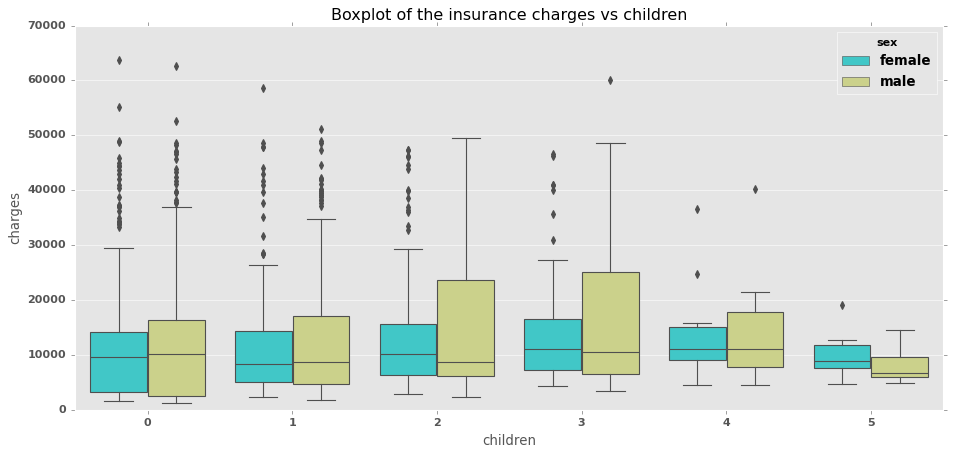

In [18]:
#boxplot

plt.figure(figsize=(14,6))

sns.boxplot(x='children',y='charges', data=insurance, hue='sex',palette='rainbow')

plt.title('Boxplot of the insurance charges vs children')

In [19]:
insurance.groupby('children').agg(['mean','min','max'])['charges']

TypeError: agg function failed [how->mean,dtype->object]

Text(0.5, 1.0, 'Violin plot of insurance charges by region')

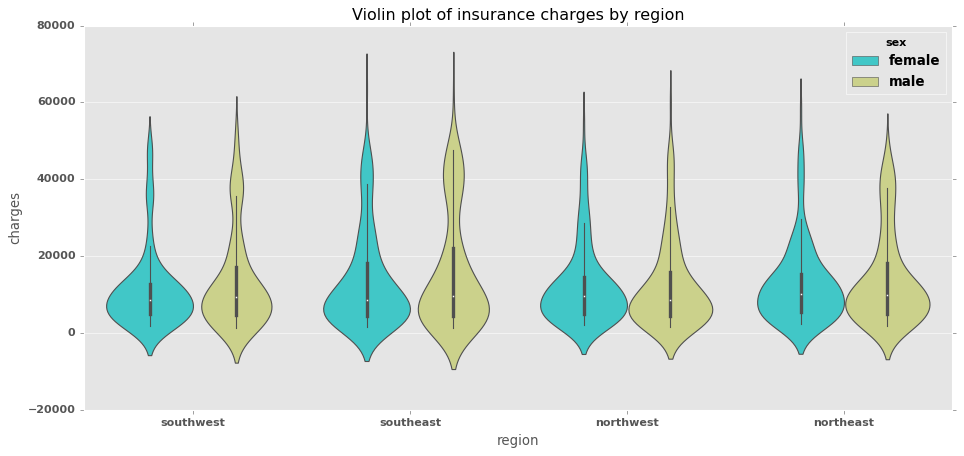

In [20]:
plt.figure(figsize=(14,6))

sns.violinplot(x='region',y='charges',data=insurance,hue='sex',palette='rainbow')

plt.title('Violin plot of insurance charges by region')

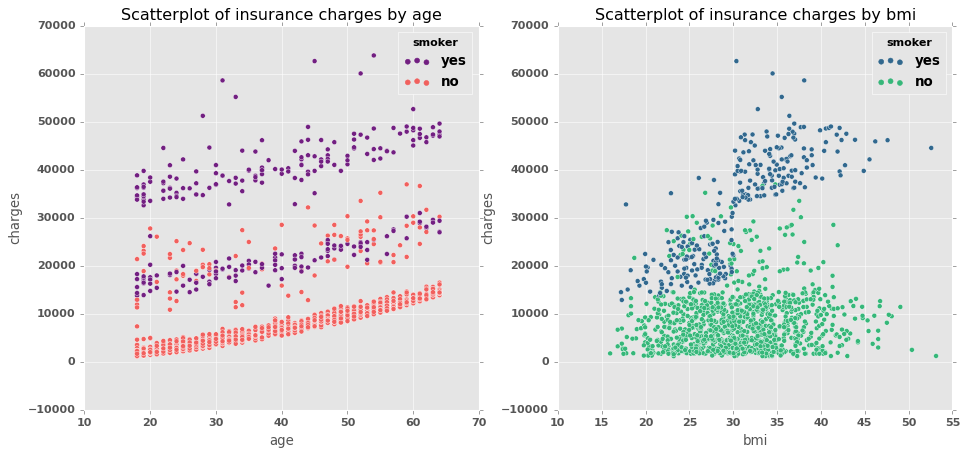

In [22]:
f=plt.figure(figsize=(14,6))

ax=f.add_subplot(121)

sns.scatterplot(x='age',y='charges',data=insurance,palette='magma',hue='smoker',ax=ax)
ax.set_title('Scatterplot of insurance charges by age')

ax=f.add_subplot(122)

sns.scatterplot(x='bmi',y='charges',data=insurance,palette="viridis",hue='smoker',ax=ax)
ax.set_title('Scatterplot of insurance charges by bmi')

plt.savefig('sc.png')

"""From left plot the minimum age person is insured is 18 year. There is slabs in policy most of 
non smoker take 1st and 2nd slab, for smoker policy start at 2nd and 3rd slab.

Body mass index (BMI) is a measure of body fat based on height and weight that applies to adult men and women. The minimum bmi is 16kg/m2
and maximum upto 54kg/m2"""

In [ ]:
#data preprocessing
"""Encoding

Machine learning algorithms cannot work with categorical data directly, categorical data must be converted to number.

    Label Encoding
    One hot encoding
    Dummy variable trap

Label encoding refers to transforming the word labels into numerical form so that the algorithms can understand how to operate on them.
A One hot encoding is a representation of categorical variable as binary vectors.It allows the representation of categorical 
data to be more expresive. This first requires that the categorical values be mapped to integer values, that is label encoding. 
Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.
The Dummy variable trap is a scenario in which the independent variable are multicollinear, a scenario in which two or more variables
are highly correlated in simple term one variable can be predicted from the others.

By using pandas get_dummies function we can do all above three step in line of code. We will this fuction to get dummy 
variable for sex, children,smoker,region features. By setting drop_first =True function will remove dummy variable trap by 
droping one variable and original variable.The pandas makes our life easy."""

In [23]:
categorical_columns =['sex','children','smoker','region']
insurance_encode = pd.get_dummies(data=insurance,prefix='OHE',prefix_sep='_',
                                  columns=categorical_columns,drop_first=True,
                                  dtype='int8')

In [24]:
# Lets verify the dummay variable process
print('Columns in original data frame:\n',insurance.columns.values)
print('\nNumber of rows and columns in the dataset:',insurance.shape)
print('\nColumns in data frame after encoding dummy variable:\n',insurance_encode.columns.values)
print('\nNumber of rows and columns in the dataset:',insurance_encode.shape)

Columns in original data frame:
 ['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']

Number of rows and columns in the dataset: (1338, 7)

Columns in data frame after encoding dummy variable:
 ['age' 'bmi' 'charges' 'OHE_male' 'OHE_1' 'OHE_2' 'OHE_3' 'OHE_4' 'OHE_5'
 'OHE_yes' 'OHE_northwest' 'OHE_southeast' 'OHE_southwest']

Number of rows and columns in the dataset: (1338, 13)


In [ ]:
"""Box -Cox transformation

A Box Cox transformation is a way to transform non-normal dependent variables into a normal shape.
Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means
that you are able to run a broader number of tests. All that we need to perform this transformation is to find lambda value and apply the rule"""

"""The trick of Box-Cox transformation is to find lambda value, however in practice this is quite affordable. 
The following function returns the transformed variable, lambda value,confidence interval"""

In [27]:
from scipy.stats import boxcox
y_bc,lam, ci = boxcox(insurance_encode['charges'], alpha=0.05)

#insurance['charges'] =y_bc
#it did not perform well for this model, so log transform is used
ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [28]:
#log transform
insurance_encode['charges']=np.log(insurance_encode['charges'])

"""The original categorical variable are remove and also one of the one hot encode varible column for perticular categorical variable
is droped from the column. So we completed all three encoding step by using get dummies function."""

In [30]:
#Train-test split
from sklearn.model_selection import train_test_split
X=insurance_encode.drop('charges', axis=1) #indpendent variable
y=insurance_encode['charges'] #dependent variable

X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=23)

In [40]:
#MODEL BUILDING

#step 1: add x0 =1 to the original dataset
X_train_0 =np.c_[np.ones((X_train.shape[0],1)), X_train]
X_test_0 =np.c_[np.ones((X_test.shape[0],1)),X_test]

#step 2: build model
theta=np.matmul(np.linalg.inv( np.matmul(X_train_0.T,X_train_0)),np.matmul(X_train_0.T,y_train))

In [41]:
#the parameters for the model
parameter = ['theta_'+str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect:x_0=1'] + list(X.columns.values)
parameter_insurance = pd.DataFrame({'Parameter':parameter,'Columns':columns,'theta':theta})

In [42]:
#scikit learn module
from sklearn.linear_model import LinearRegression

lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train) #remember x0=1 so need to add, sklearn will take care of it

#Parameter
sk_theta = [lin_reg.intercept_]+list(lin_reg.coef_)
parameter_df = parameter_insurance.join(pd.Series(sk_theta, name='Sklearn_theta'))
parameter_insurance

,Parameter,Columns,theta
0,theta_0,intersect:x_0=1,7.059171
1,theta_1,age,0.033134
2,theta_2,bmi,0.013517
3,theta_3,OHE_male,-0.067767
4,theta_4,OHE_1,0.149457
5,theta_5,OHE_2,0.272919
6,theta_6,OHE_3,0.244095
7,theta_7,OHE_4,0.523339
8,theta_8,OHE_5,0.466030
9,theta_9,OHE_yes,1.550481


In [43]:
#model evaluation
y_pred_norm=np.matmul(X_test_0,theta)

#evaluation:MSE
j_mse=np.sum(y_pred_norm-y_test)**2/X_test_0.shape[0]

#r square
sse=np.sum((y_pred_norm-y_test)**2)
sst=np.sum((y_test-y_test.mean())**2)
R_square=1-(sse/sst)

print('The mean square erro (mse) or j(theta) is: ',j_mse)
print('R squared obtained for the normal equation is: ', R_square)

The mean square erro (mse) or j(theta) is:  0.007751749415315426
R squared obtained for the normal equation is:  0.7795687545055322


In [44]:
#sklearn regression module
y_pred_sk=lin_reg.predict(X_test)
#evaluation
from sklearn.metrics import mean_squared_error
j_mse_sk=mean_squared_error(y_pred_sk,y_test)
#R square
R_square_sk=lin_reg.score(X_test,y_test)
print('The mean squared error is: ', j_mse_sk)
print('R square obtained from scikit learn library is: ', R_square_sk)

"""The model returns R2 value of 77.95%, so it fit our data test very well, but still we can imporve the the performance of by diffirent technique. Please make a note that
we have transformer out variable by applying natural log. When we put model into production antilog is applied to the equation."""

The mean squared error is:  0.18729622322981895
R square obtained from scikit learn library is:  0.7795687545055319


In [ ]:
#model validation
""""In order to validated model we need to check few assumption of linear regression model. The common assumption for Linear 
Regression model are following

    Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. 
    This can be checked by scatter ploting Actual value Vs Predicted value
    The residual error plot should be normally distributed.
    The mean of residual error should be 0 or close to 0 as much as possible
    The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
    Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the 
    independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation
    between independent variables and strength of that correlation."""
"""If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. 
If heteroscedastic plot would exhibit a funnel shape pattern."""

C:\Users\Baha\AppData\Local\Temp\ipykernel_11736\3987469581.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
C:\Users\Baha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Check for Residual normality & mean: \n Residual eror')

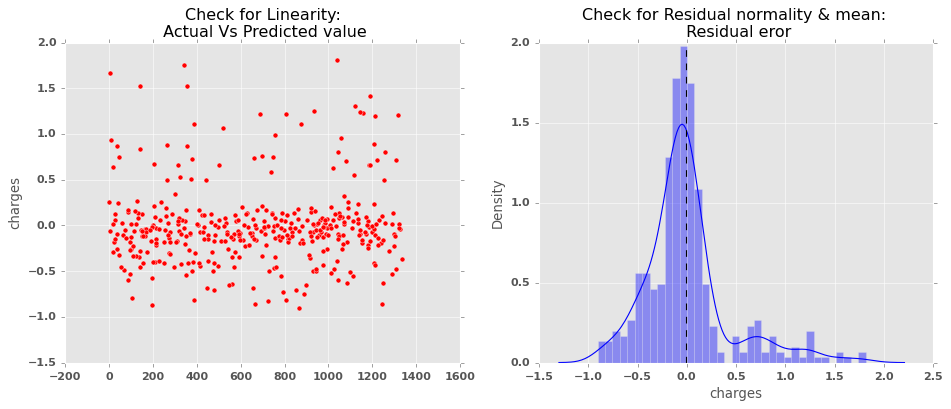

In [49]:
# Check for Linearity
f = plt.figure(figsize=(14,5))
ax = f.add_subplot(121)
sns.scatterplot(y_test-y_pred_sk,ax=ax,color='r')
ax.set_title('Check for Linearity:\n Actual Vs Predicted value')

# Check for Residual normality & mean
ax = f.add_subplot(122)
sns.distplot((y_test - y_pred_sk),ax=ax,color='b')
ax.axvline((y_test - y_pred_sk).mean(),color='k',linestyle='--')
ax.set_title('Check for Residual normality & mean: \n Residual eror')

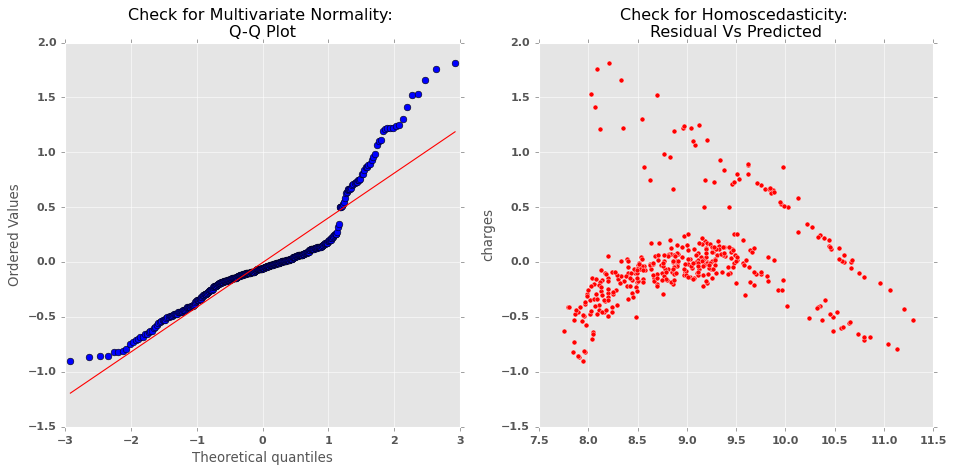

In [48]:
# Check for Multivariate Normality
# Quantile-Quantile plot 
f,ax = plt.subplots(1,2,figsize=(14,6))
import scipy as sp
_,(_,_,r)= sp.stats.probplot((y_test - y_pred_sk),fit=True,plot=ax[0])
ax[0].set_title('Check for Multivariate Normality: \nQ-Q Plot')

#Check for Homoscedasticity
sns.scatterplot(y = (y_test - y_pred_sk), x= y_pred_sk, ax = ax[1],color='r') 
ax[1].set_title('Check for Homoscedasticity: \nResidual Vs Predicted');

In [50]:
# Check for Multicollinearity
#Variance Inflation Factor
VIF = 1/(1- R_square_sk)
VIF

4.536561945911138

In [ ]:


"""The model assumption linear regression as follows

    In our model the actual vs predicted plot is curve so linear assumption fails
    The residual mean is zero and residual error plot right skewed
    Q-Q plot shows as value log value greater than 1.5 trends to increase
    The plot is exhibit heteroscedastic, error will insease after certian point.
    Variance inflation factor value is less than 5, so no multicollearity."""